#  Sentiment Analysis Using Unsupervised Lexical Models

**Sentiment Analysis** also konwn as *opinion mining* or *emotion AI* is perhaps one of the most popular applications of natural language processing and text analytics with a vast number of websites, books and tutorials on this subject. Typically sentiment analysis seems to work best on subjective text, where people express opinions, feelings, and their mood. From a real-world industry standpoint, sentiment analysis is widely used to analyze corporate surveys, feedback surveys, social media data, and reviews for movies, places, commodities, and many more. The idea is to analyze and understand the reactions of people toward a specific entity and take insightful actions based on their sentiment.

**Lexicon-based** Sentiment Analysis techniques, as opposed to the Machine Learning techniques, are based on calculation of polarity scores given to positive and negative words in a document.

Sentiment polarity is typically a numeric score that’s assigned to both the positive and negative aspects of a text document based on subjective parameters like specific words and phrases expressing feelings and emotion. Neutral sentiment typically has 0 polarity since it does not express and specific sentiment, positive sentiment will have polarity > 0, and negative < 0. Of course, you can always change these thresholds based on the type of text you are dealing with; there are no hard constraints on this.

Unsupervised sentiment analysis models make use of well curated knowledgebases, ontologies, lexicons and databases which have detailed information pertaining to subjective words, phrases including sentiment, mood, polarity, objectivity, subjectivity and so on. A lexicon model typically uses a lexicon, also known as a dictionary or vocabulary of words specifically aligned towards sentiment analysis. Usually these lexicons contain a list of words associated with positive and negative sentiment, polarity (magnitude of negative or positive score), parts of speech (POS) tags, subjectivity classifiers (strong, weak, neutral), mood, modality and so on.

In [37]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zahid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zahid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Zahid\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Zahid\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zahid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
import pandas as pd
import numpy as np
# import nltk
import textblob
from sklearn.metrics import confusion_matrix, classification_report
np.set_printoptions(precision=2, linewidth=80)
# import text_normalizer as tn

In [39]:
dataset = pd.read_csv("movie_reviews.csv.bz2", compression='bz2')

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [41]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [42]:
# extract data for model evaluation
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]
sample_review_ids = [7626, 3533, 13010]
# normalize dataset
# test_reviews_df = tn.normalize_corpus(test_reviews)

In [43]:
# test_reviews = np.array(test_reviews_df)
test_reviews = np.array(test_reviews)

# Sentiment Analysis with TextBlob

TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. A good thing about TextBlob is that they are just like python strings. 

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].


In [44]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:',
          textblob.TextBlob(review).sentiment.polarity)
    print('-'*60)

REVIEW: no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!
Actual Sentiment: negative
Predicted Sentiment polarity: -0.3625
------------------------------------------------------------
REVIEW: I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.
Actual Sentiment: positive
Predicted Sentiment polarity: 0.16666666666666674
------------------------------------------------------------
REVIEW: Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot
Actual Sentiment: positive
Predicted Sentiment polarity: -0.037239583333333326
------------------------------------------------------------


In [45]:
# Predict sentiment for test dataset
sentiment_polarity = [textblob.TextBlob(
    review).sentiment.polarity for review in test_reviews]

In [46]:
predicted_sentiments = ['positive' if score >=
                        0.1 else 'negative' for score in sentiment_polarity]

In [47]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))
pd.DataFrame(confusion_matrix(test_sentiments,
             predicted_sentiments), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.77      0.76      0.76      7490
    positive       0.76      0.78      0.77      7510

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000



,negative,positive
negative,5668,1822
positive,1675,5835


In [48]:
Text = test_reviews[sample_review_ids]
Real_sentiments = test_sentiments[sample_review_ids]
TextBlob_sentiment_polarity = sentiment_polarity[7626], sentiment_polarity[3533], sentiment_polarity[13010]
TextBlob_predicted_sentiments = predicted_sentiments[
    7626], predicted_sentiments[3533], predicted_sentiments[13010]

In [49]:
TextBlob_sample_report = {'Text': Text, 'Real_sentiments': Real_sentiments, 'TextBlob_sentiment_polarity': TextBlob_sentiment_polarity,
                          'TextBlob_predicted_sentiments': TextBlob_predicted_sentiments}
TextBlob_sample_report = pd.DataFrame(data=TextBlob_sample_report)

In [50]:
TextBlob_sample_report

,Text,Real_sentiments,TextBlob_sentiment_polarity,TextBlob_predicted_sentiments
0,"no comment - stupid movie, acting average or w...",negative,-0.362500,negative
1,I don't care if some people voted this movie t...,positive,0.166667,positive
2,Worst horror film ever but funniest film ever ...,positive,-0.037240,negative


In [51]:
def color_negative_red(value):
    """
    Colors elements in a dateframe
    green if positive and red if
    negative. Does not color NaN
    values.
    """

    if value == 'positive':
        color = 'green'
    else:
        color = 'red'

    return 'color: %s' % color

In [52]:
df = TextBlob_sample_report.copy()

In [53]:
df.style.applymap(color_negative_red, subset=[
                  'Real_sentiments', 'TextBlob_predicted_sentiments'])

,Text,Real_sentiments,TextBlob_sentiment_polarity,TextBlob_predicted_sentiments
0,"no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!",negative,-0.362500,negative
1,I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.,positive,0.166667,positive
2,Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot,positive,-0.037240,negative


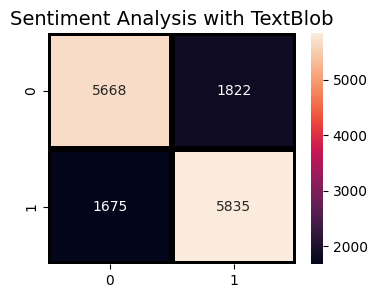

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(test_sentiments, predicted_sentiments),
            annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Sentiment Analysis with TextBlob", fontsize=14)
plt.show()

In [55]:
from sklearn.metrics import accuracy_score
TextBlob_model = accuracy_score(test_sentiments, predicted_sentiments)
print(TextBlob_model)

0.7668666666666667


# Sentiment Analysis with AFINN

The AFINN lexicon is perhaps one of the simplest and most popular lexicons and can be used extensively for sentiment analysis.Developed and curated by Finn Årup Nielsen.It contains 3300+ words with a polarity score associated with each word. Words scores range from minus five (negative) to plus five (positive).  You can find this lexicon at the author’s official GitHub repository along with previous versions of this lexicon including AFINN-111 at https://github.com/ fnielsen/afinn/blob/master/afinn/data/.

In [56]:
from afinn import Afinn

afn = Afinn(emoticons=True)

In [57]:
afinn_wl_url = ('https://raw.githubusercontent.com'
                '/fnielsen/afinn/master/afinn/data/AFINN-111.txt')

afinn_wl_df = pd.read_csv(afinn_wl_url,
                          header=None,  # no column names
                          sep='\t',  # tab sepeated
                          names=['term', 'value'])  # new column names

seed = 808  # seed for sample so results are stable
afinn_wl_df.sample(10, random_state=seed)

,term,value
1852,regret,-2
1285,indifferent,-2
681,disappoints,-2
770,doubts,-1
1644,outmaneuvered,-2
55,admit,-1
1133,haha,3
1160,haunt,-1
2435,wishing,1
21,abused,-3


In [58]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', afn.score(review))
    print('-'*60)

REVIEW: no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!
Actual Sentiment: negative
Predicted Sentiment polarity: -7.0
------------------------------------------------------------
REVIEW: I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.
Actual Sentiment: positive
Predicted Sentiment polarity: 3.0
------------------------------------------------------------
REVIEW: Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot
Actual Sentiment: positive
Predicted Sentiment polarity: -3.0
------------------------------------------------------------


In [59]:
sentiment_polarity = [afn.score(review) for review in test_reviews]
predicted_sentiments = ['positive' if score >=
                        1.0 else 'negative' for score in sentiment_polarity]

In [60]:
afn_sentiment_polarity = sentiment_polarity[7626], sentiment_polarity[3533], sentiment_polarity[13010]
afn_predicted_sentiments = predicted_sentiments[7626], predicted_sentiments[3533], predicted_sentiments[13010]

In [61]:
afn_sample_report = {'Text': Text, 'Real_sentiments': Real_sentiments, 'afn_sentiment_polarity': afn_sentiment_polarity,
                     'afn_predicted_sentiments': afn_predicted_sentiments}
afn_sample_report = pd.DataFrame(data=afn_sample_report)

In [62]:
afn_sample_report.style.applymap(color_negative_red, subset=[
                                 'Real_sentiments', 'afn_predicted_sentiments'])

,Text,Real_sentiments,afn_sentiment_polarity,afn_predicted_sentiments
0,"no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!",negative,-7.000000,negative
1,I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.,positive,3.000000,positive
2,Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot,positive,-3.000000,negative


In [63]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))

              precision    recall  f1-score   support

    negative       0.79      0.57      0.67      7490
    positive       0.67      0.85      0.75      7510

    accuracy                           0.71     15000
   macro avg       0.73      0.71      0.71     15000
weighted avg       0.73      0.71      0.71     15000



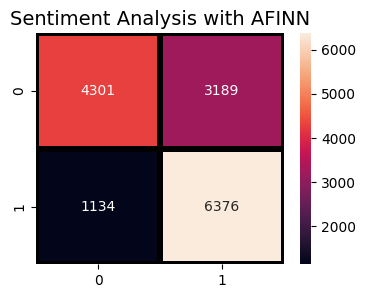

In [64]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(test_sentiments, predicted_sentiments),
            annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Sentiment Analysis with AFINN", fontsize=14)
plt.show()

In [65]:
from sklearn.metrics import accuracy_score
AFINN_model = accuracy_score(test_sentiments, predicted_sentiments)
print(AFINN_model)

0.7118


# Sentiment Analysis with SentiWordNet

SentiWordNet is a lexical resource for opinion mining.SentiWordNet operates on the database provided by WordNet.The additional functionality that it provides is the measure of positivity, negativity or neutrality as is required for Sentiment Analysis.
* Thus, every synset *s* is associated with a 
    Pos(s): a positivity score
    Neg(s): a negativity score
    Obj(s): an objectivity (neutrality) score
    
    Pos(s) + Neg(s) + Obj(s) = 1
* The scores are very precise, pertaining to the word itself alongwith its context.
All three scores range within the values [0,1].
The current version of SentiWordNet is 3.0, which is based on WordNet 3.0

In [86]:
from nltk.corpus import sentiwordnet as swn

awesome = list(swn.senti_synsets('awesome', 'a'))[0]
print('Positive Polarity Score:', awesome.pos_score())
print('Negative Polarity Score:', awesome.neg_score())
print('Objective Score:', awesome.obj_score())

Positive Polarity Score: 0.875
Negative Polarity Score: 0.125
Objective Score: 0.0


In [87]:
list(swn.senti_synsets('slow'))

[SentiSynset('decelerate.v.01'),
 SentiSynset('slow.v.02'),
 SentiSynset('slow.v.03'),
 SentiSynset('slow.a.01'),
 SentiSynset('slow.a.02'),
 SentiSynset('dense.s.04'),
 SentiSynset('slow.a.04'),
 SentiSynset('boring.s.01'),
 SentiSynset('dull.s.08'),
 SentiSynset('slowly.r.01'),
 SentiSynset('behind.r.03')]

In [88]:
import spacy

# Load the English language model (make sure you have already downloaded it using "en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

def analyze_sentiment_sentiwordnet_lexicon(review,verbose=False):

    # tokenize and POS tag text tokens
    # tagged_text = [(token.text, token.tag_) for token in tn.nlp(review)]
    tagged_text = [(token.text, token.tag_) for token in nlp(review)]
    pos_score = neg_score = token_count = obj_score = 0
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word, tag in tagged_text:
        ss_set = None
        if 'NN' in tag and list(swn.senti_synsets(word, 'n')):
            ss_set = list(swn.senti_synsets(word, 'n'))[0]
        elif 'VB' in tag and list(swn.senti_synsets(word, 'v')):
            ss_set = list(swn.senti_synsets(word, 'v'))[0]
        elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')):
            ss_set = list(swn.senti_synsets(word, 'a'))[0]
        elif 'RB' in tag and list(swn.senti_synsets(word, 'r')):
            ss_set = list(swn.senti_synsets(word, 'r'))[0]
        # if senti-synset is found
        if ss_set:
            # add scores for all found synsets
            pos_score += ss_set.pos_score()
            neg_score += ss_set.neg_score()
            obj_score += ss_set.obj_score()
            token_count += 1

    # aggregate final scores
    final_score = pos_score - neg_score
    norm_final_score = round(float(final_score) / token_count, 2)
    final_sentiment = 'positive' if norm_final_score >= 0 else 'negative'
    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score, norm_pos_score,
                                         norm_neg_score, norm_final_score]],
                                       columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'],
                                                             ['Predicted Sentiment', 'Objectivity',
                                                              'Positive', 'Negative', 'Overall']],
                                                             labels=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]]))
        print(sentiment_frame)

    return final_sentiment

In [89]:
predicted_sentiments = [analyze_sentiment_sentiwordnet_lexicon(review, verbose=False) for review in test_reviews]

In [90]:
snet_predicted_sentiments = predicted_sentiments[7626], predicted_sentiments[3533], predicted_sentiments[13010]

In [91]:
sentiwordnet_sample_report = {'Text': Text, 'Real_sentiments': Real_sentiments,
                              'snet_predicted_sentiments': snet_predicted_sentiments}
sentiwordnet_sample_report = pd.DataFrame(data=sentiwordnet_sample_report)

In [92]:
sentiwordnet_sample_report

,Text,Real_sentiments,snet_predicted_sentiments
0,"no comment - stupid movie, acting average or w...",negative,negative
1,I don't care if some people voted this movie t...,positive,positive
2,Worst horror film ever but funniest film ever ...,positive,positive


In [93]:
sentiwordnet_sample_report.style.applymap(
    color_negative_red, subset=['Real_sentiments', 'snet_predicted_sentiments'])

,Text,Real_sentiments,snet_predicted_sentiments
0,"no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!",negative,negative
1,I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.,positive,positive
2,Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot,positive,positive


In [94]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))

              precision    recall  f1-score   support

    negative       0.78      0.27      0.40      7490
    positive       0.56      0.92      0.70      7510

    accuracy                           0.60     15000
   macro avg       0.67      0.60      0.55     15000
weighted avg       0.67      0.60      0.55     15000



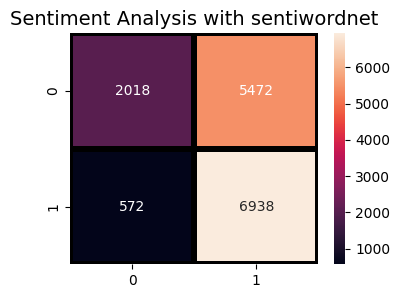

In [95]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(test_sentiments, predicted_sentiments),
            annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Sentiment Analysis with sentiwordnet", fontsize=14)
plt.show()

In [96]:
sentiwordnet_model = accuracy_score(test_sentiments, predicted_sentiments)
print(sentiwordnet_model)

0.5970666666666666


# Sentiment Analysis with VADER

The VADER lexicon, developed by C.J. Hutto, is based on a rule-based sentiment analysis framework, specifically tuned to analyze sentiments in social media. VADER stands for Valence Aware Dictionary and sEntiment Reasoner. Details about this framework can be read in the original paper by Hutto, C.J., and Gilbert, E.E. (2014), entitled “VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text,” from the proceedings of the Eighth International Conference on Weblogs and Social Media (ICWSM-14). You can use the library based on NLTK’s interface under the nltk. sentiment.vader module.
There were a total of over 9,000 lexical features from which over 7,500 curated lexical features were finally selected in the lexicon with proper validated valence scores.

Each feature was rated on a scale from "[-4] Extremely Negative" to "[4] Extremely Positive", with allowance for "[0] Neutral (or Neither, N/A)".

In [100]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


def analyze_sentiment_vader_lexicon(review,
                                    threshold=0.1,
                                    verbose=False):
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'positive' if agg_score >= threshold\
        else 'negative'
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,negative, neutral]],
                                       columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'],
                                                                     ['Predicted Sentiment', 'Polarity Score',
                                                                      'Positive', 'Negative', 'Neutral']],
                                                             codes=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]]))
        print(sentiment_frame)

    return final_sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Zahid\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [102]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=True)
    print('-'*60)

REVIEW: no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!
Actual Sentiment: negative
     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0            negative           -0.8     0.0%    40.0%   60.0%
------------------------------------------------------------
REVIEW: I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.
Actual Sentiment: positive
     SENTIMENT STATS:                                                     
  Predicted Sentiment Polarity Score Positive             Negative Neutral
0            negative          -0.16    17.0%  14.000000000000002%   69.0%
------------------------------------------------------------
REVIEW: Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unb

In [103]:
predicted_sentiments = [analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=False) for review in test_reviews]

In [104]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))

              precision    recall  f1-score   support

    negative       0.78      0.59      0.67      7490
    positive       0.67      0.83      0.74      7510

    accuracy                           0.71     15000
   macro avg       0.72      0.71      0.71     15000
weighted avg       0.72      0.71      0.71     15000



In [105]:
vader_predicted_sentiments = predicted_sentiments[7626], predicted_sentiments[3533], predicted_sentiments[13010]

In [106]:
vader_sample_report = {'Text': Text, 'Real_sentiments': Real_sentiments,
                       'vader_predicted_sentiments': vader_predicted_sentiments}
vader_sample_report = pd.DataFrame(data=vader_sample_report)

In [107]:
vader_sample_report.style.applymap(color_negative_red, subset=[
                                   'Real_sentiments', 'vader_predicted_sentiments'])

,Text,Real_sentiments,vader_predicted_sentiments
0,"no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!",negative,negative
1,I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.,positive,negative
2,Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot,positive,positive


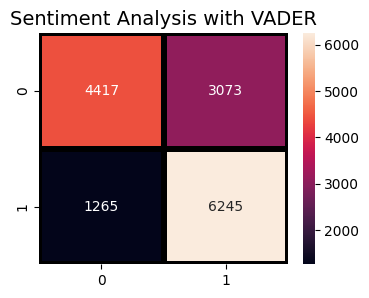

In [108]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(test_sentiments, predicted_sentiments),
            annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Sentiment Analysis with VADER", fontsize=14)
plt.show()

In [109]:
VADER_model = accuracy_score(test_sentiments, predicted_sentiments)
print(VADER_model)

0.7108


In [110]:
import plotly.graph_objects as go

x = ['TextBlob', 'AFINN', 'SentiWordNet', 'VADER']
y = [TextBlob_model, AFINN_model, sentiwordnet_model, VADER_model]

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y,)])
# Customize aspect
fig.update_layout(title_text='Sentiment Analysis - Unsupervised Lexical')
fig.show()